 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
df_whale = pd.read_csv('./whale_returns.csv', index_col='Date', parse_dates=['Date'], infer_datetime_format=True, memory_map=True)
df_whale.index = df_whale.index.strftime('%m-%d-%Y')
df_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
03-02-2015,NaN,NaN,NaN,NaN
03-03-2015,-0.001266,-0.004981,-0.000496,-0.006569
03-04-2015,0.002230,0.003241,-0.002534,0.004213
03-05-2015,0.004016,0.004076,0.002355,0.006726
03-06-2015,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
04-25-2019,-0.000285,-0.001291,-0.005153,0.004848
04-26-2019,0.008149,0.009162,0.012355,0.010434
04-29-2019,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
df_whale.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
df_whale = df_whale.dropna()
df_whale.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
df_algo = pd.read_csv('./algo_returns.csv', index_col='Date', parse_dates=['Date'], infer_datetime_format=True, memory_map=True)
df_algo.index = df_algo.index.strftime('%m-%d-%Y')
df_algo

,Algo 1,Algo 2
Date,,
05-28-2014,0.001745,NaN
05-29-2014,0.003978,NaN
05-30-2014,0.004464,NaN
06-02-2014,0.005692,NaN
06-03-2014,0.005292,NaN
...,...,...
04-25-2019,0.000682,-0.007247
04-26-2019,0.002981,0.005256
04-29-2019,0.005208,0.002829


In [6]:
# Count nulls
df_algo.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
df_algo = df_algo.dropna()
df_algo.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
df_SP500 = pd.read_csv('./sp500_history.csv', index_col='Date', parse_dates=['Date'], infer_datetime_format=True, memory_map=True)[::-1]
df_SP500.index = df_SP500.index.strftime('%m-%d-%Y')
df_SP500

,Close
Date,
10-01-2012,$1444.49
10-02-2012,$1445.75
10-03-2012,$1450.99
10-04-2012,$1461.40
10-05-2012,$1460.93
...,...
04-16-2019,$2907.06
04-17-2019,$2900.45
04-18-2019,$2905.03


In [9]:
# Check Data Types
df_SP500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
df_SP500[df_SP500.columns[:]] = df_SP500[df_SP500.columns[:]].replace('[\$,]', '', regex=True).astype(np.float32)
df_SP500.dtypes

Close    float32
dtype: object

In [11]:
# Calculate Daily Returns
df_SP500['SPX Returns'] = df_SP500['Close'].pct_change()
df_SP500

,Close,SPX Returns
Date,,
10-01-2012,1444.489990,NaN
10-02-2012,1445.750000,0.000872
10-03-2012,1450.989990,0.003624
10-04-2012,1461.400024,0.007174
10-05-2012,1460.930054,-0.000322
...,...,...
04-16-2019,2907.060059,0.000509
04-17-2019,2900.449951,-0.002274
04-18-2019,2905.030029,0.001579


In [12]:
# Drop nulls
df_SP500 = df_SP500.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
df_SP500 = df_SP500.rename(columns={'Close':'SPX Close'})
df_SP500

,SPX Close,SPX Returns
Date,,
10-02-2012,1445.750000,0.000872
10-03-2012,1450.989990,0.003624
10-04-2012,1461.400024,0.007174
10-05-2012,1460.930054,-0.000322
10-08-2012,1455.880005,-0.003457
...,...,...
04-16-2019,2907.060059,0.000509
04-17-2019,2900.449951,-0.002274
04-18-2019,2905.030029,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df0 = pd.concat([df_whale, df_algo, df_SP500], axis=1).dropna()
df = df0.drop(['SPX Close'], axis=1)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

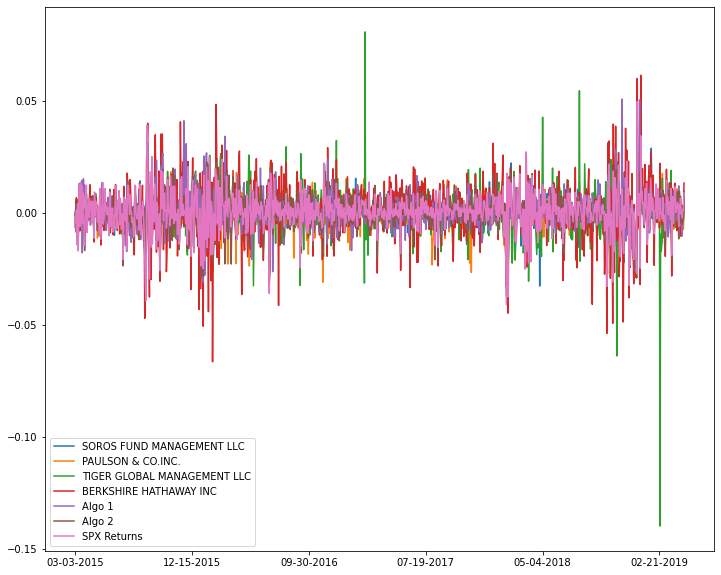

In [15]:
# Plot daily returns of all portfolios
df.plot(legend=True, figsize=(12,10))

#### Calculate and Plot cumulative returns.

[]

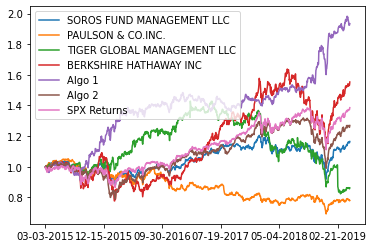

In [17]:
# Calculate cumulative returns of all portfolios
df_cumulative = (1 + df).cumprod()
# Plot cumulative returns
df_cumulative.plot(legend=True).plot(legend=True, figsize=(12,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

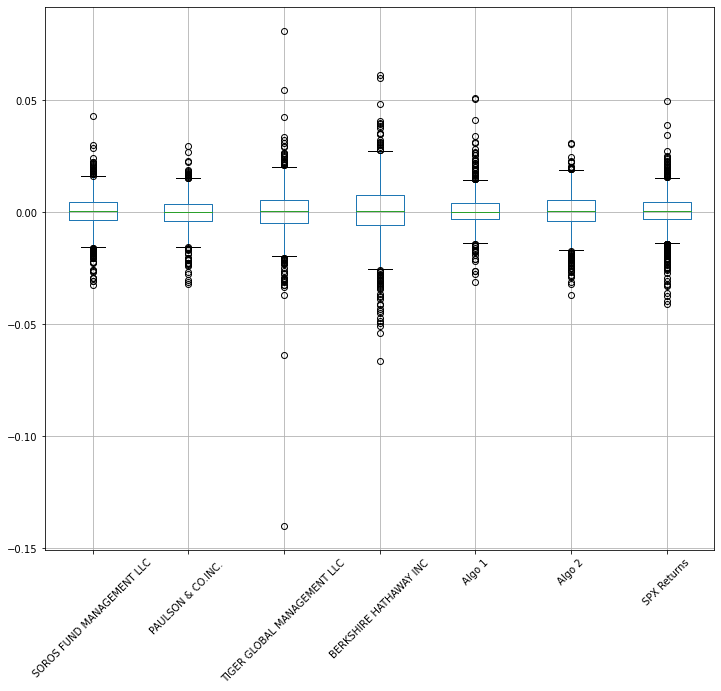

In [18]:
# Box plot to visually show risk
df.boxplot(rot=45, figsize=(12,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
df_risk = df.std(ddof=0)
df_risk.values

array([0.00789159, 0.00701971, 0.01088875, 0.01291242, 0.00761655,
       0.00833827, 0.00854963])

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp_std = df['SPX Returns'].std(ddof=0)
# Determine which portfolios are riskier than the S&P 500
df_risk.loc[ df_risk.values > sp_std ]

TIGER GLOBAL MANAGEMENT LLC    0.010889
BERKSHIRE HATHAWAY INC         0.012912
SPX Returns                    0.008550
dtype: float64

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = df.std() * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

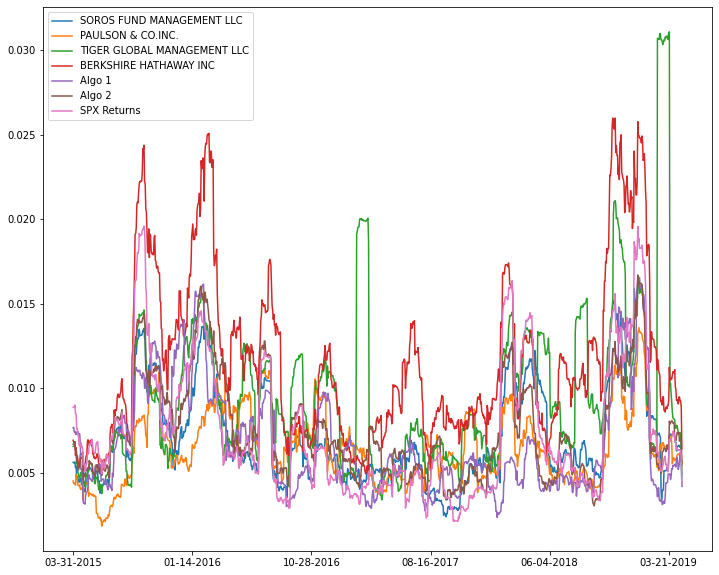

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_rolling_std = df.rolling(21).std(ddof=0).dropna()
# Plot the rolling standard deviation
df_rolling_std.plot(legend=True, figsize=(12,10))

### Calculate and plot the correlation

<AxesSubplot:>

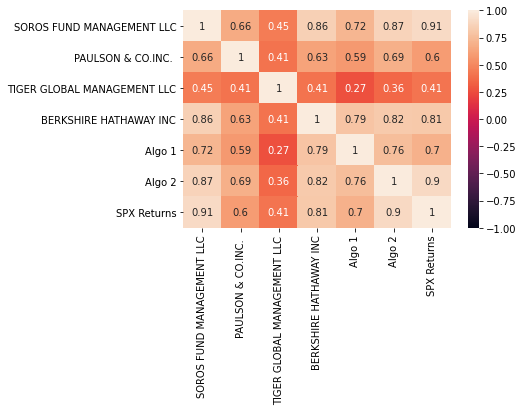

In [25]:
# Calculate the correlation
df_rolling_std_corr = df_rolling_std.corr()
# Display de correlation matrix
sns.heatmap(df_rolling_std_corr, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

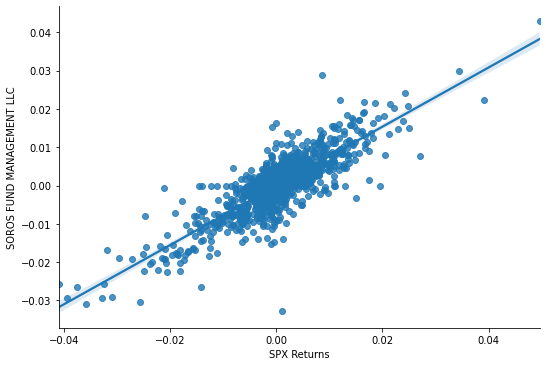

In [30]:
# Calculate covariance of a single portfolio
soros_spx_cov = df['SOROS FUND MANAGEMENT LLC'].cov(df['SPX Returns'])
# Calculate variance of S&P 500
spx_var = df['SPX Returns'].var()
# Computing beta
soros_spx_beta = soros_spx_cov/spx_var
# Plot beta trend
sns.lmplot(x='SPX Returns', y='SOROS FUND MANAGEMENT LLC', data=df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:>

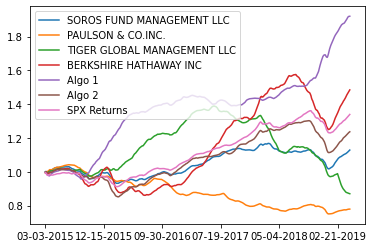

In [40]:
# Use `ewm` to calculate the rolling window
df_ewm = df_cumulative.ewm(21).mean()
df_ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Annualized Sharpe Ratios
sharpe_ratios = df.rolling(252).mean() / df.rolling(252).std(ddof=0) * np.sqrt(252)
sharpe_ratios = sharpe_ratios.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX Returns
03-01-2016,-0.286911,-0.417194,0.489007,-0.488033,1.791139,-0.844548,-0.319531
03-02-2016,-0.241883,-0.347576,0.490048,-0.460293,1.805851,-0.768611,-0.268210
03-03-2016,-0.248995,-0.408368,0.520809,-0.499036,1.843664,-0.735948,-0.221337
03-04-2016,-0.247799,-0.486215,0.500889,-0.431962,1.890349,-0.714576,-0.208756
03-07-2016,-0.151681,-0.365968,0.514055,-0.433407,1.900870,-0.551952,-0.119655
...,...,...,...,...,...,...,...
04-16-2019,0.261966,0.154370,-1.027681,0.187863,2.294993,0.122296,0.621977
04-17-2019,0.196006,0.059508,-1.072586,0.122724,2.174229,0.030382,0.537050
04-18-2019,0.167020,0.045866,-1.043954,0.109758,2.218223,0.005154,0.542023
04-22-2019,0.207900,0.033898,-1.006275,0.106507,2.173920,0.029960,0.587452


<AxesSubplot:>

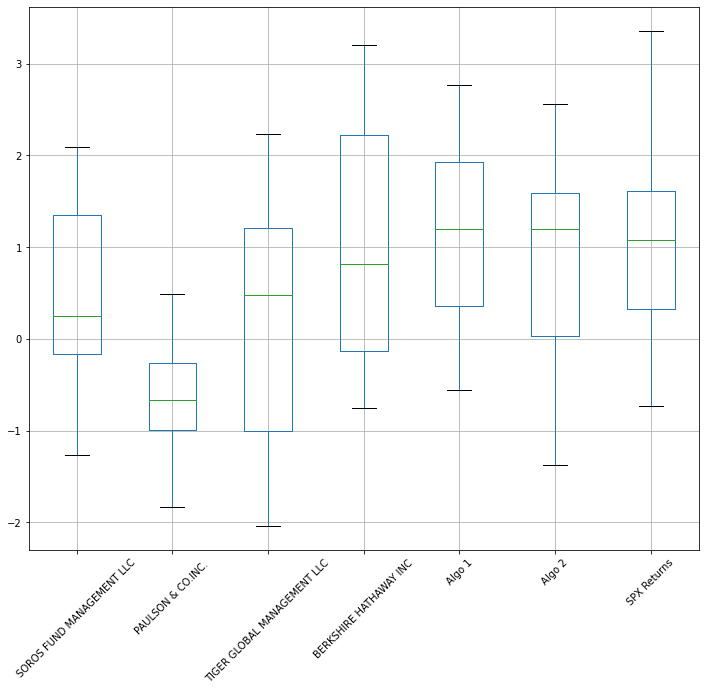

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.boxplot(rot=45, figsize=(12,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

We can see from the ewm of returns plot and the sharpe ratio boxplot that Algo 1 and Berkshire Hathaway both beat the S&P 500. However, the sharpe ratio indicates that on a risk to return basis Algo 1 and Algo 2 both beat the S&P 500. From both of these results we can say with confidence that Algo 1 outperforms both the market and the whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `ENPH` - [Enphase Energy Inc.](https://www.investopedia.com/markets/quote?tvwidgetsymbol=ENPH)

* `TSLA` - [Tesla Inc.](https://www.investopedia.com/markets/quote?tvwidgetsymbol=TSLA)

* `BTC-USD` - [Bitcoin](https://en.wikipedia.org/wiki/Bitcoin)

In [128]:
# Reading data from 1st stock
df_tsla = pd.read_csv('./TSLA.csv', index_col='Date', parse_dates=['Date'], infer_datetime_format=True, memory_map=True)
df_tsla.index = df_tsla.index.strftime('%m-%d-%Y')
df_tsla = df_tsla.rename(columns={'Close': 'TSLA'})
df_tsla

,TSLA
Date,
12-16-2019,76.30
12-17-2019,75.80
12-18-2019,78.63
12-19-2019,80.81
12-20-2019,81.12
...,...
12-07-2020,641.76
12-08-2020,649.88
12-09-2020,604.48


In [129]:
# Reading data from 2nd stock
df_btc = pd.read_csv('./BTCUSD.csv', index_col='Date', parse_dates=['Date'], infer_datetime_format=True, memory_map=True)
df_btc.index = df_btc.index.strftime('%m-%d-%Y')
df_btc = df_btc.rename(columns={'Close': 'BTCUSD'})
df_btc

,BTCUSD
Date,
12-16-2019,6884.75
12-17-2019,6615.80
12-18-2019,7294.81
12-19-2019,7150.01
12-20-2019,7182.77
...,...
12-09-2020,18559.90
12-10-2020,18279.00
12-11-2020,18056.70


In [130]:
# Reading data from 3rd stock
df_enph = pd.read_csv('./ENPH.csv', index_col='Date', parse_dates=['Date'], infer_datetime_format=True, memory_map=True)
df_enph.index = df_enph.index.strftime('%m-%d-%Y')
df_enph = df_enph.rename(columns={'Close': 'ENPH'})
df_enph

,ENPH
Date,
12-16-2019,25.76
12-17-2019,25.85
12-18-2019,25.74
12-19-2019,25.96
12-20-2019,25.94
...,...
12-07-2020,129.32
12-08-2020,134.74
12-09-2020,127.26


In [131]:
# Combine all stocks in a single DataFrame
df1 = pd.concat([df_tsla, df_enph, df_btc], axis=1)
df1

,TSLA,ENPH,BTCUSD
12-16-2019,76.30,25.76,6884.75
12-17-2019,75.80,25.85,6615.80
12-18-2019,78.63,25.74,7294.81
12-19-2019,80.81,25.96,7150.01
12-20-2019,81.12,25.94,7182.77
...,...,...,...
11-29-2020,NaN,NaN,18190.00
12-05-2020,NaN,NaN,19135.90
12-06-2020,NaN,NaN,19348.40
12-12-2020,NaN,NaN,18811.50


In [132]:
# Reset Date index
df1 = df1.dropna()
df1

,TSLA,ENPH,BTCUSD
12-16-2019,76.30,25.76,6884.75
12-17-2019,75.80,25.85,6615.80
12-18-2019,78.63,25.74,7294.81
12-19-2019,80.81,25.96,7150.01
12-20-2019,81.12,25.94,7182.77
...,...,...,...
12-07-2020,641.76,129.32,19202.10
12-08-2020,649.88,134.74,18319.70
12-09-2020,604.48,127.26,18559.90
12-10-2020,627.07,131.21,18279.00


In [133]:
# Reorganize portfolio data by having a column per symbol
df1

,TSLA,ENPH,BTCUSD
12-16-2019,76.30,25.76,6884.75
12-17-2019,75.80,25.85,6615.80
12-18-2019,78.63,25.74,7294.81
12-19-2019,80.81,25.96,7150.01
12-20-2019,81.12,25.94,7182.77
...,...,...,...
12-07-2020,641.76,129.32,19202.10
12-08-2020,649.88,134.74,18319.70
12-09-2020,604.48,127.26,18559.90
12-10-2020,627.07,131.21,18279.00


In [134]:
# Calculate daily returns
df1_rets = df1.pct_change()
# Drop NAs
df1_rets = df1_rets.dropna()
# Display sample data
df1_rets

,TSLA,ENPH,BTCUSD
12-17-2019,-0.006553,0.003494,-0.039065
12-18-2019,0.037335,-0.004255,0.102635
12-19-2019,0.027725,0.008547,-0.019850
12-20-2019,0.003836,-0.000770,0.004582
12-23-2019,0.033531,0.033539,0.019552
...,...,...,...
12-07-2020,0.071314,-0.008738,0.024686
12-08-2020,0.012653,0.041912,-0.045953
12-09-2020,-0.069859,-0.055514,0.013112
12-10-2020,0.037371,0.031039,-0.015135


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:>

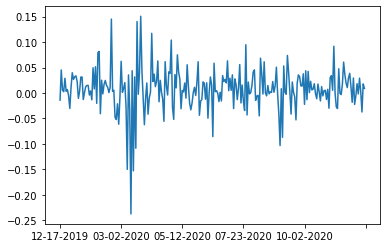

In [135]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = df1_rets.dot(weights)

# Display sample data
portfolio_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [136]:
# Join your returns DataFrame to the original returns DataFrame
df1_rets = df1_rets.join([portfolio_returns])
df1_rets = df1_rets.rename(columns={0:'Portfolio'})
df1_rets

,TSLA,ENPH,BTCUSD,Portfolio
12-17-2019,-0.006553,0.003494,-0.039065,-0.014041
12-18-2019,0.037335,-0.004255,0.102635,0.045238
12-19-2019,0.027725,0.008547,-0.019850,0.005474
12-20-2019,0.003836,-0.000770,0.004582,0.002549
12-23-2019,0.033531,0.033539,0.019552,0.028874
...,...,...,...,...
12-07-2020,0.071314,-0.008738,0.024686,0.029087
12-08-2020,0.012653,0.041912,-0.045953,0.002870
12-09-2020,-0.069859,-0.055514,0.013112,-0.037421
12-10-2020,0.037371,0.031039,-0.015135,0.017758


In [137]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df1_rets = df1_rets.dropna()
df1_rets

,TSLA,ENPH,BTCUSD,Portfolio
12-17-2019,-0.006553,0.003494,-0.039065,-0.014041
12-18-2019,0.037335,-0.004255,0.102635,0.045238
12-19-2019,0.027725,0.008547,-0.019850,0.005474
12-20-2019,0.003836,-0.000770,0.004582,0.002549
12-23-2019,0.033531,0.033539,0.019552,0.028874
...,...,...,...,...
12-07-2020,0.071314,-0.008738,0.024686,0.029087
12-08-2020,0.012653,0.041912,-0.045953,0.002870
12-09-2020,-0.069859,-0.055514,0.013112,-0.037421
12-10-2020,0.037371,0.031039,-0.015135,0.017758


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [138]:
# Calculate the annualized `std`
df1_std = df1_rets.std(ddof=0) * np.sqrt(252)
df1_std

TSLA         0.890772
ENPH         1.027215
BTCUSD       0.735533
Portfolio    0.660333
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

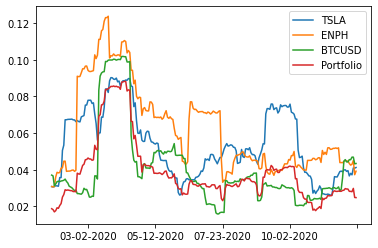

In [139]:
# Calculate rolling standard deviation
df1_std = df1_rets.rolling(24).std(ddof=0)
# Plot rolling standard deviation
df1_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

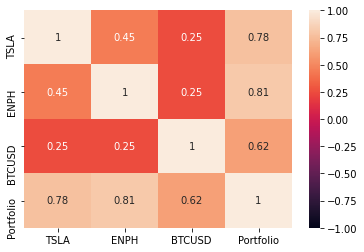

In [140]:
# Calculate and plot the correlation
df1_corr = df1_rets.corr()
# Display de correlation matrix
sns.heatmap(df1_corr, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [141]:
df_spx = pd.read_csv('./SP500.csv', index_col='Date', parse_dates=['Date'], infer_datetime_format=True, memory_map=True)
df_spx.index = df_spx.index.strftime('%m-%d-%Y')
df_spx = df_spx.rename(columns={'Close': 'SP 500'})
df_spx.head()

,SP 500
Date,
12-16-2019,3191.45
12-17-2019,3192.52
12-18-2019,3191.14
12-19-2019,3205.37
12-20-2019,3221.22


<AxesSubplot:>

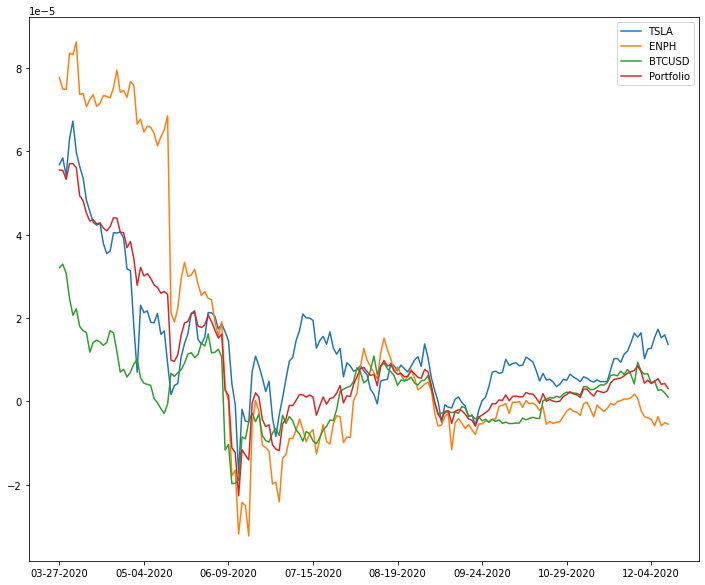

In [165]:
# Calculate and plot Beta
rolling_cov = df1_rets.rolling(60).cov(df_spx['SP 500']).dropna()
rolling_var = df_spx.rolling(60).var().dropna()
rolling_beta = rolling_cov/df_spx.var()[0]
rolling_beta.plot(figsize=(12,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [169]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = df1_rets.mean() / df1_rets.std(ddof=0) * np.sqrt(252)
sharpe_ratios = sharpe_ratios.dropna()
sharpe_ratios

TSLA         2.809475
ENPH         2.168051
BTCUSD       1.725557
Portfolio    3.028200
dtype: float64

<AxesSubplot:>

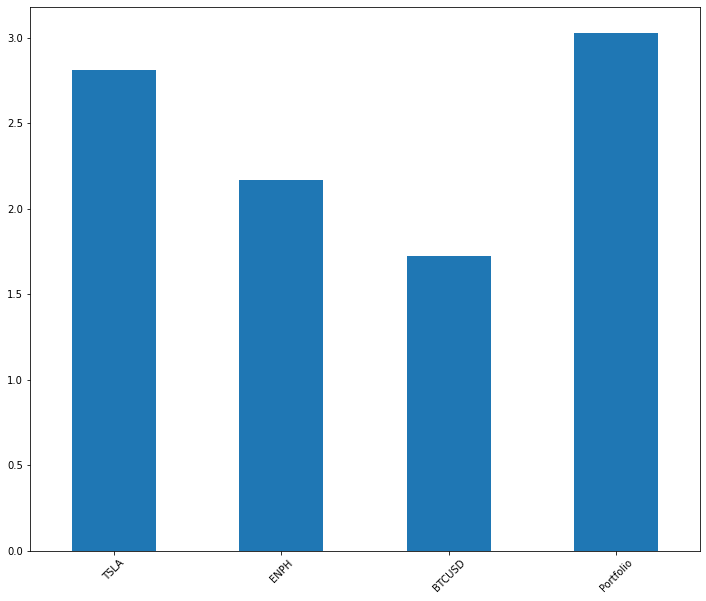

In [172]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(rot=45, figsize=(12,10))

### How does your portfolio do?

The portfolio I constructed did not outperform buy and hold of tesla but it did outperform the S&P 500. However we do not have the ability to know which position would do better in the long run so I would rather use the portfolio to safeguard gains. As we can see from the sharpe ratio plot, the portfolio had the highest sharp ratio at a whopping 3.03. In investment terms this portfolio would be considered excellent.

[]

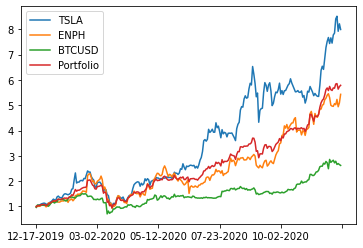

In [173]:
# Calculate cumulative returns of all portfolios
df_cumulative = (1 + df1_rets).cumprod()
# Plot cumulative returns
df_cumulative.plot(legend=True).plot(legend=True, figsize=(12,10))